<a href="https://colab.research.google.com/github/hamidrezanorouzi/myPythonTemp/blob/main/sinFunction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparing the input data

In [120]:
import numpy as np

n = 200
split = 0.5
trainingSetLen = int(n * split+1);
noiseMag = 0.01
x = np.linspace(-1,1, num = n) #.reshape(-1, 1)
np.random.shuffle(x)
epsilon = noiseMag * (2*np.random.rand(n)-1) #.reshape(-1,1)
y = np.sin(2*np.pi*x)+epsilon

x_train = x[0:trainingSetLen]
y_train = y[0:trainingSetLen]
x_valid = x[trainingSetLen:]
y_valid = y[trainingSetLen:]


# Building model

In [121]:
from tensorflow import keras

def buildModel(l):
  model = keras.Sequential([
      keras.Input(shape=(1,)),
      keras.layers.Dense(100,activation='tanh', kernel_regularizer = keras.regularizers.L2(l), name='inputLayer'),
      keras.layers.Dense(100,activation='tanh', kernel_regularizer = keras.regularizers.L2(l), name='hidden1'),
      keras.layers.Dense(1,activation='tanh', kernel_regularizer = keras.regularizers.L2(l), name = 'outputLayer')
  ], name='sinFunction')
  model.compile(optimizer=keras.optimizers.AdamW(), loss='mse', metrics=['mae'])
  return model
model = buildModel(1.0e-5)



# Training the model

In [ ]:
history = model.fit(
    x_train, y_train,
    epochs = 5000,
    validation_data = (x_valid, y_valid), verbose=1
    )




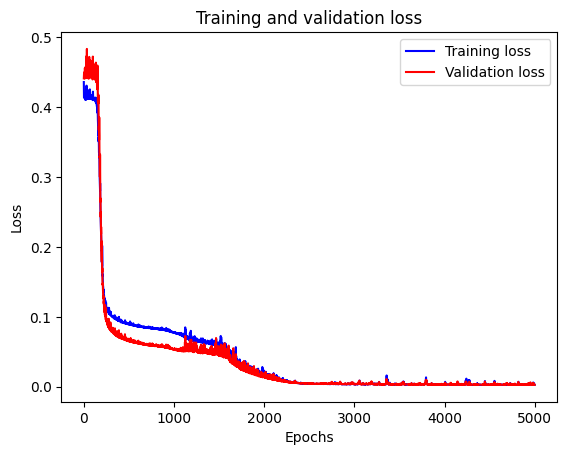

In [123]:
import matplotlib.pyplot as plt
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

5/5 [==============================] - 0s 3ms/step


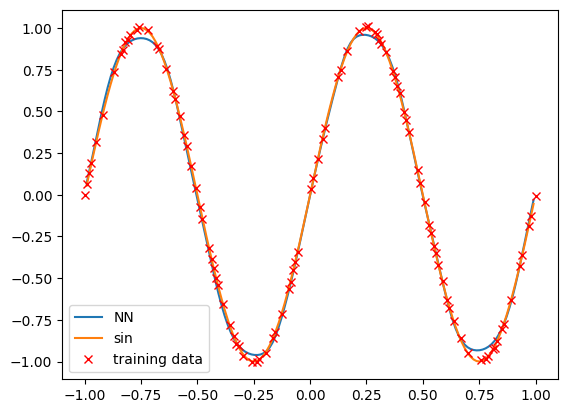

In [124]:
import matplotlib.pyplot as plt
x_test = np.linspace(-.9913213,.991233123,150)
y_test = model.predict(x_test)
y_sin = np.sin(2*np.pi*x_test)
plt.plot(x_test, y_test)
plt.plot(x_test,y_sin)
plt.plot(x_train, y_train,'rx')
plt.legend(('NN', 'sin', 'training data'))